In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [ ]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [ ]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

## Parameters
### Shipments Data

In [4]:
df_rep = pd.read_csv('In/donut.csv', sep=',', index_col = 0)
print('{:,} lines'.format(len(df_rep)))
df_rep.head()

10,000 lines


,Test,Order Time,Order Date,City,Store,#Shipment,Order Amount,Transmission OnTime,Transmission,Start PickPack,Pickpack,Loading,Expected Loading Date,Loading OnTime,Loading Date,Airport Arrival,Airport OnTime,Airport Arrival Date,Takeoff,Landing,Landing Date,Landing OnTime,Start Clearance,End Clearance,Leaving Airport,Store Arrival,Store Arrival Date,Delivery OnTime,Delivery Time,Extraction Time,Last Status,Reason Code,Late,Is Late,LT
0,1,2021-05-02 17:00:00.000000,2021-05-02,CITY1,CITY1/ST5,2021-05-02/CITY1/ST5/1,2759,False,2021-05-03 17:00:00.000000,2021-05-04 07:00:00.000000,2021-05-04 14:59:24.110031,2021-05-04 19:00:00.000000,2021-05-04,True,2021-05-04,2021-05-04 22:12:25.287328,True,2021-05-04,2021-05-05 06:00:00.000000,2021-05-05 17:21:54.063605,2021-05-05,True,2021-05-06 09:00:00.000000,2021-05-06 11:28:29.885088,2021-05-06 12:11:41.670951,2021-05-06 16:36:04.552300,2021-05-06,False,2021-05-07 16:30:00.000000,2021-05-11 10:00:00,Delivery Time,Multi,Late,True,4.979167
1,2,2021-05-09 12:00:00.000000,2021-05-09,CITY2,CITY2/ST9,2021-05-09/CITY2/ST9/2,1503,True,2021-05-09 13:19:07.490100,2021-05-10 07:00:00.000000,2021-05-10 13:06:21.199744,2021-05-10 19:00:00.000000,2021-05-10,True,2021-05-10,2021-05-10 21:03:12.499908,True,2021-05-10,2021-05-11 06:00:00.000000,2021-05-11 17:55:05.410750,2021-05-11,True,2021-05-12 09:00:00.000000,2021-05-12 10:40:20.644386,2021-05-12 11:24:43.182335,2021-05-12 16:19:07.938647,2021-05-12,True,2021-05-12 16:19:07.938647,2021-05-11 10:00:00,Takeoff,NaN,OnTime,False,3.179953
2,3,2021-05-02 14:00:00.000000,2021-05-02,CITY2,CITY2/ST1,2021-05-02/CITY2/ST1/3,5140,True,2021-05-02 15:32:13.222838,2021-05-03 07:00:00.000000,2021-05-03 10:02:38.267727,2021-05-03 19:00:00.000000,2021-05-03,True,2021-05-03,2021-05-03 21:57:53.558586,True,2021-05-03,2021-05-04 06:00:00.000000,2021-05-04 15:27:37.223174,2021-05-04,True,2021-05-05 09:00:00.000000,2021-05-05 10:41:51.173022,2021-05-05 11:31:39.810786,2021-05-05 14:46:07.574411,2021-05-05,True,2021-05-05 14:46:07.574411,2021-05-11 10:00:00,Delivery Time,NaN,OnTime,False,3.032032
3,4,2021-05-11 11:00:00.000000,2021-05-11,CITY4,CITY4/ST3,2021-05-11/CITY4/ST3/4,1677,True,2021-05-11 12:01:04.166619,2021-05-12 07:00:00.000000,2021-05-12 14:42:24.907373,2021-05-12 19:00:00.000000,2021-05-12,True,2021-05-12,2021-05-12 22:55:15.523629,True,2021-05-12,2021-05-13 06:00:00.000000,2021-05-13 17:23:21.684039,2021-05-13,True,2021-05-14 09:00:00.000000,2021-05-14 11:08:13.649559,2021-05-14 11:56:58.067537,2021-05-14 15:46:42.418481,2021-05-14,True,2021-05-14 15:46:42.418481,2021-05-11 10:00:00,Open,NaN,OnTime,False,3.199102
4,5,2021-05-08 10:00:00.000000,2021-05-08,CITY4,CITY4/ST1,2021-05-08/CITY4/ST1/5,4158,True,2021-05-08 10:56:14.062500,2021-05-09 07:00:00.000000,2021-05-09 15:32:46.865584,2021-05-09 19:00:00.000000,2021-05-09,True,2021-05-09,2021-05-09 22:00:24.600200,True,2021-05-09,2021-05-10 06:00:00.000000,2021-05-10 18:24:25.314204,2021-05-10,True,2021-05-11 09:00:00.000000,2021-05-11 10:37:52.951322,2021-05-11 11:17:12.114757,2021-05-11 16:00:59.003211,2021-05-11,True,2021-05-11 16:00:59.003211,2021-05-11 10:00:00,Start Clearance,NaN,OnTime,False,3.250683


In [9]:
# PARAMS
EXTRACTION_DAY = '2021-05-11'
EXTRACTION_DAY = pd.to_datetime(EXTRACTION_DAY).date()

### Find late status

In [15]:
# Count Status
df_late = df_rep[(df_rep['Last Status']== 'Delivery Time') & (df_rep['Reason Code'] != '')].copy()
df_late = pd.DataFrame(df_late.groupby(['Reason Code'])['#Shipment'].nunique())
df_late.head()

,#Shipment
Reason Code,
Delivery,406
Landing,182
Loading,73
Multi,483
Transmission,673


#### Late Shipment - Delivered

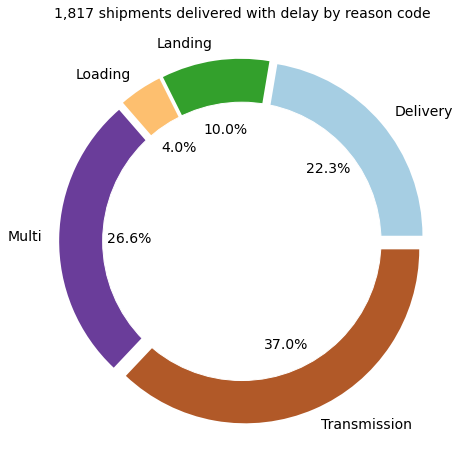

In [20]:
my_circle = plt.Circle( (0,0), 0.8, color='white')

ax = df_late.plot.pie(figsize=(8, 8),
                      y='#Shipment'
                      , legend= False, fontsize = 14, colormap='Paired', autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 
                                                                                                     0.05, 0.05))
plt.title('{:,} shipments delivered with delay by reason code'.format(df_late['#Shipment'].sum()), fontsize = 14)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()